# Baseball Case Study
Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
-- Input features-
1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

-- Output: Number of predicted wins (W)


In [1]:
# To import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import math
import sklearn
from scipy.stats import boxcox as bxcx
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import (StandardScaler,
                                  PolynomialFeatures)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataframe
df =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# to check number of rows and columns
df.shape

(30, 17)

In [4]:
# to check column names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
#to check for duplicate values
df.duplicated().sum()

0

The dataset doesn't contain any duplicated values.

In [7]:
# to check for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values are present in the dataframe

In [8]:
# detailed description adout dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


The dataframe contains 30 rows and 17 columns.

16 columns datatype is int64 and 1 column is float64 datatype.

# Visualising the data sets

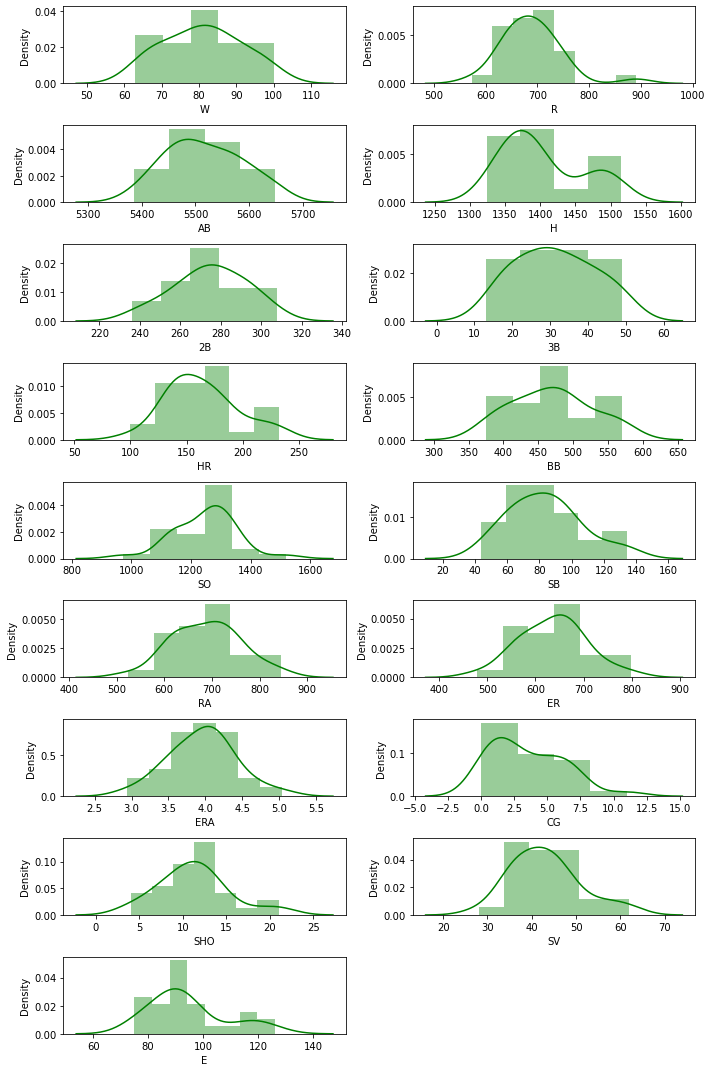

In [9]:
# to plot distplot 
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
plt.figure(figsize = (10,15))
for i in range(len(columns)):
    plt.subplot(9,2, i+1)
    sns.distplot(df[columns[i]],color = 'g');
plt.tight_layout()

We can infer from the datsets that most of the data is normally distributed like W,3B,ERA,SV.

R,E,SHO,CG are right skewed and data is widely spread.

SO is left skewed.

In [10]:
# to get statistical analysis of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


SO has highest sandard deviation of 103.75 whereas CG has the least stnadard deviation of 3.46

The bandwidth between mean of each column is unsymetrical.

In [12]:
#To find the range of all columns
df.max()-df.min()

W       37.0
R      318.0
AB     264.0
H      191.0
2B      72.0
3B      36.0
HR     132.0
BB     195.0
SO     545.0
SB      90.0
RA     319.0
ER     321.0
ERA      2.1
CG      11.0
SHO     17.0
SV      34.0
E       51.0
dtype: float64

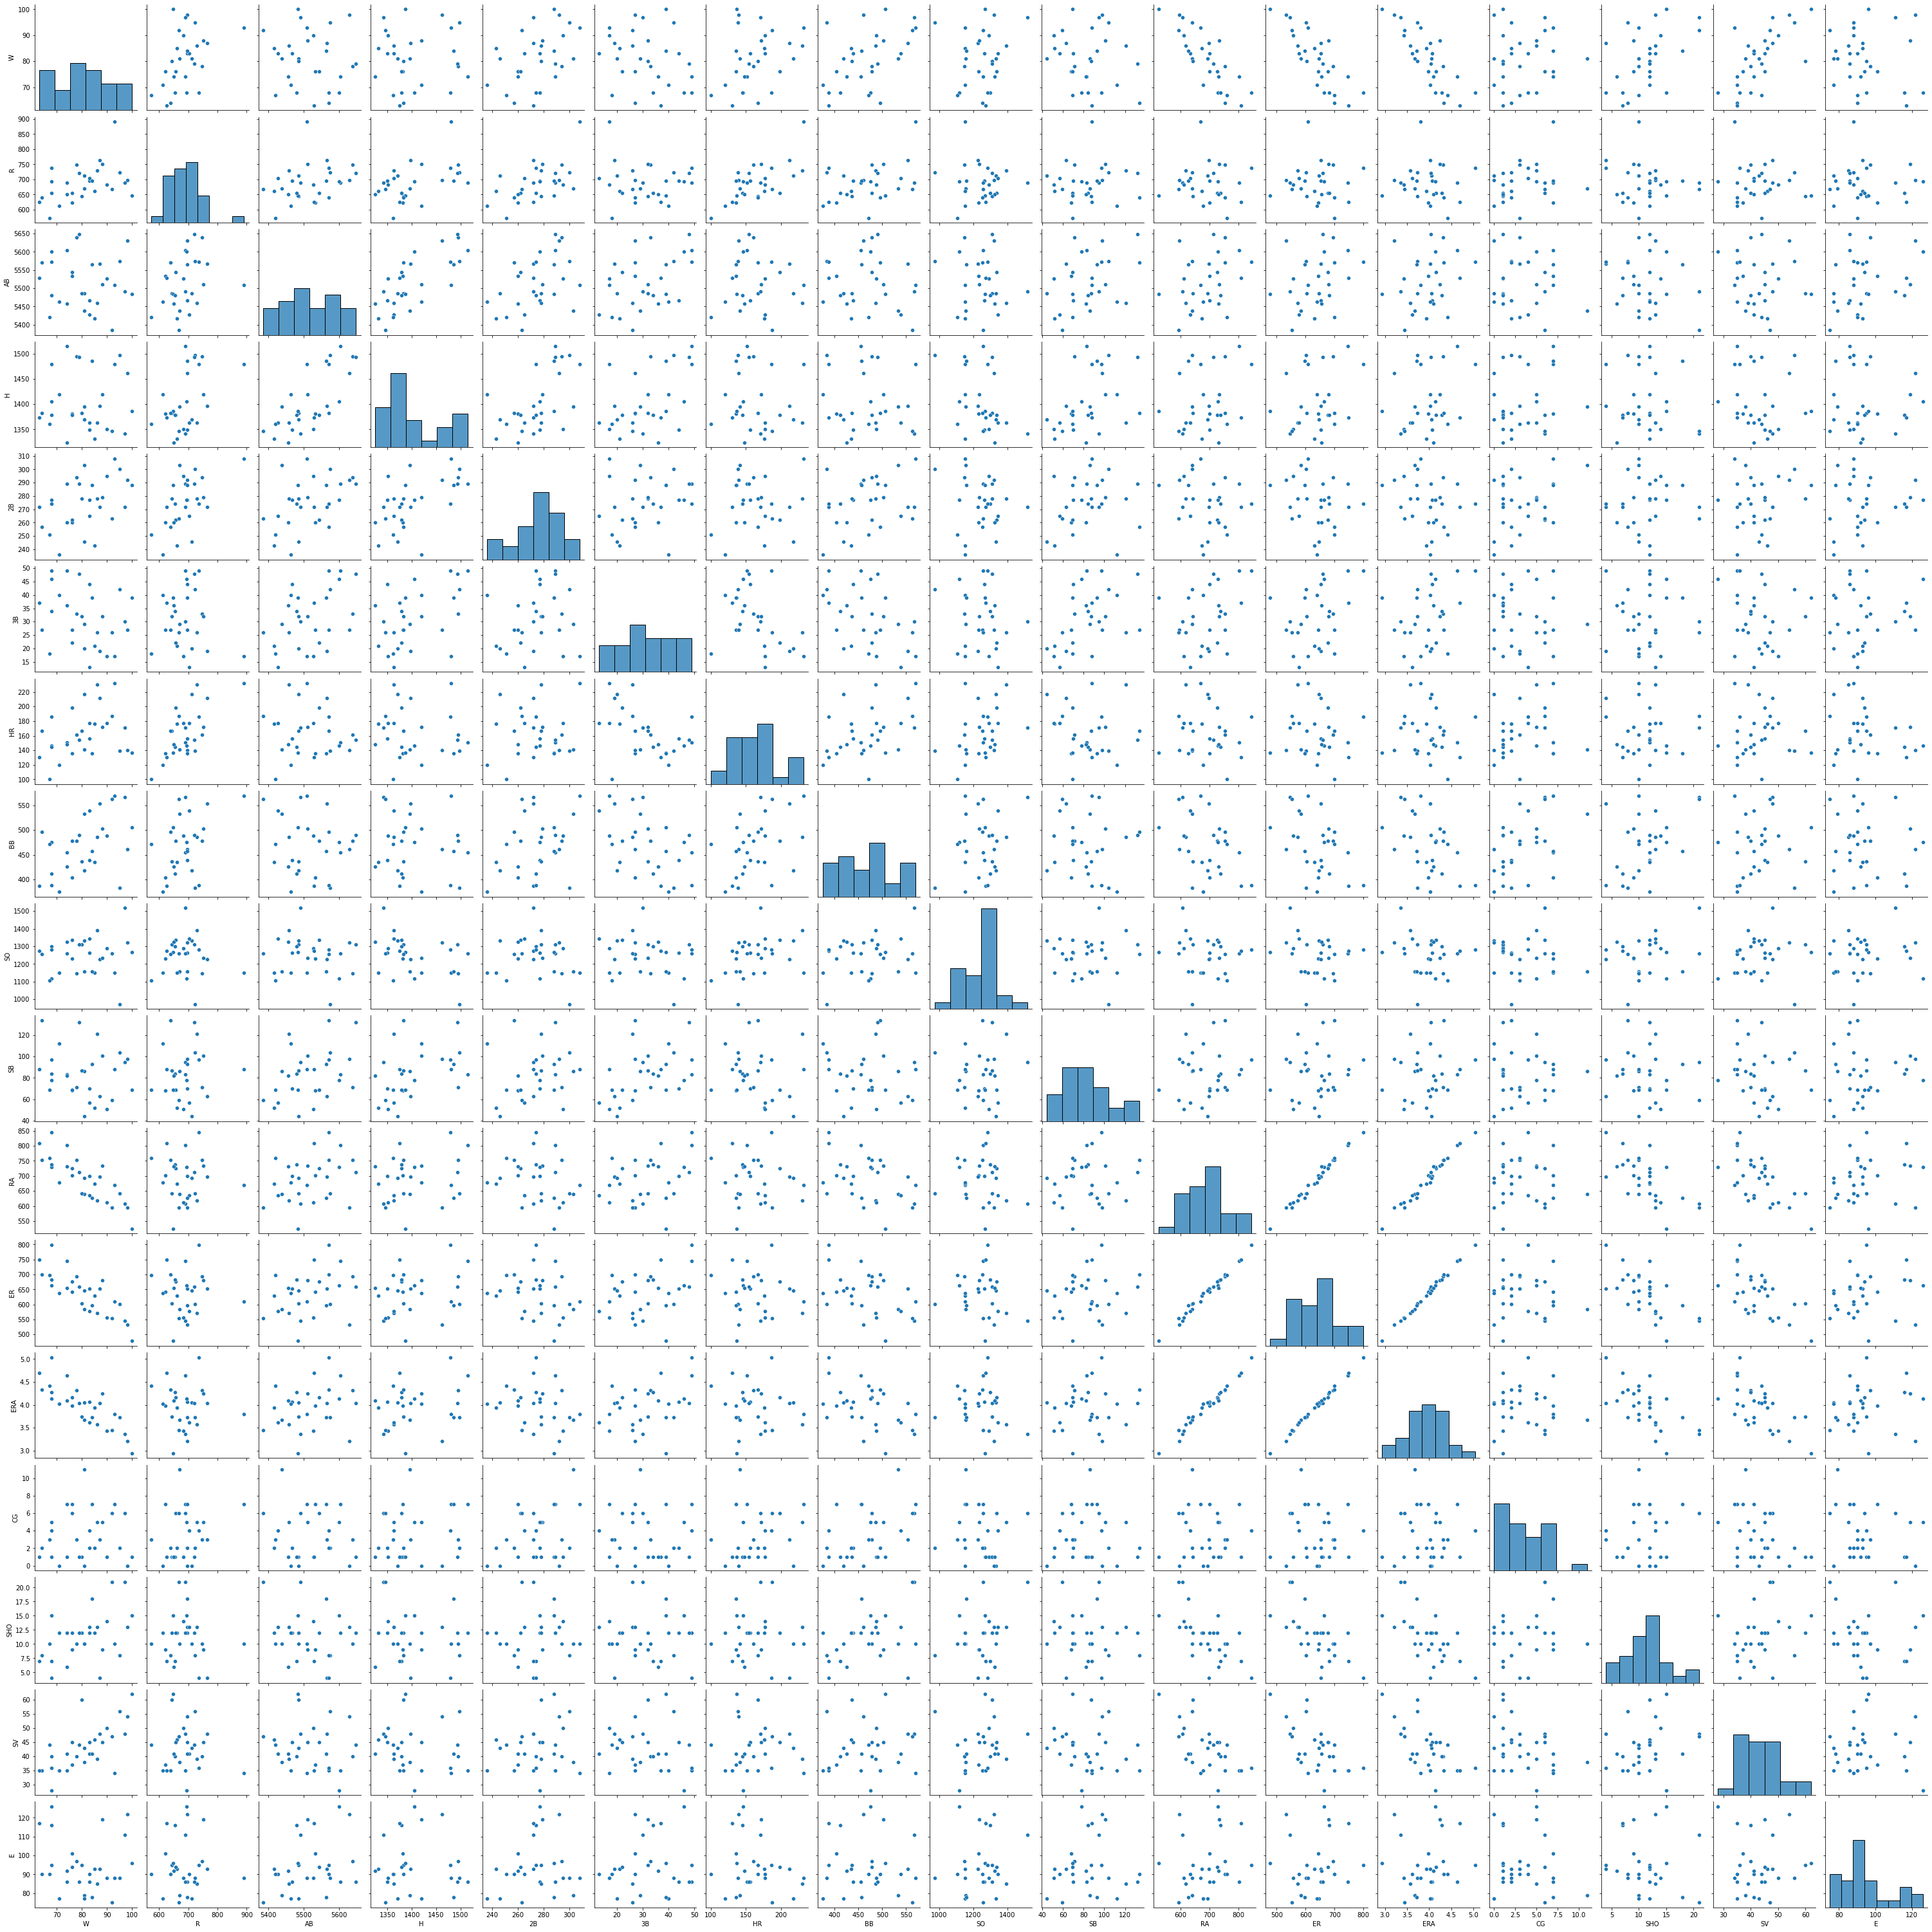

In [13]:
# to check relation among each column with one another.
sns.pairplot(data=df)

Analysing the above plots we can conclude that there is no proper linear relationship among the columns.

In [14]:
# to analyse the correlation of each column
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

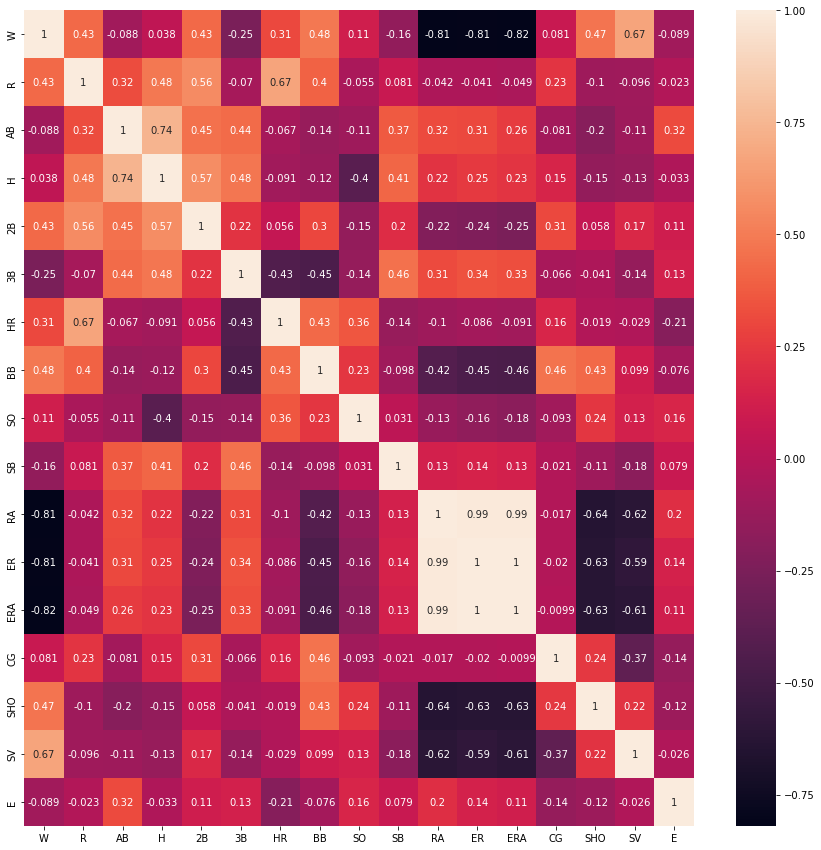

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),color ='k',annot=True)

from thre above heatmap we can analyse that-- RA,ER,and ERA have very strong correlation among themselves but they have very negitive correlation with the label column i.e,W

overall view of the map show us that most of the columns have positive correlation to each other ,few columns are highly correlated and few are very negitively correlated.

In [16]:
#dropping the columns with very high multicollinearity
df.drop(['RA','ER','ERA'],axis=1,inplace=True)
df.head(3)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79


In [17]:
# to check the shape of the dataframe after dropping 3 columns
df.shape

(30, 14)

In [18]:
# to check skewness in the data
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

W         AxesSubplot(0.125,0.772143;0.133621x0.107857)
R      AxesSubplot(0.285345,0.772143;0.133621x0.107857)
AB      AxesSubplot(0.44569,0.772143;0.133621x0.107857)
H      AxesSubplot(0.606034,0.772143;0.133621x0.107857)
2B     AxesSubplot(0.766379,0.772143;0.133621x0.107857)
3B        AxesSubplot(0.125,0.642714;0.133621x0.107857)
HR     AxesSubplot(0.285345,0.642714;0.133621x0.107857)
BB      AxesSubplot(0.44569,0.642714;0.133621x0.107857)
SO     AxesSubplot(0.606034,0.642714;0.133621x0.107857)
SB     AxesSubplot(0.766379,0.642714;0.133621x0.107857)
CG        AxesSubplot(0.125,0.513286;0.133621x0.107857)
SHO    AxesSubplot(0.285345,0.513286;0.133621x0.107857)
SV      AxesSubplot(0.44569,0.513286;0.133621x0.107857)
E      AxesSubplot(0.606034,0.513286;0.133621x0.107857)
dtype: object

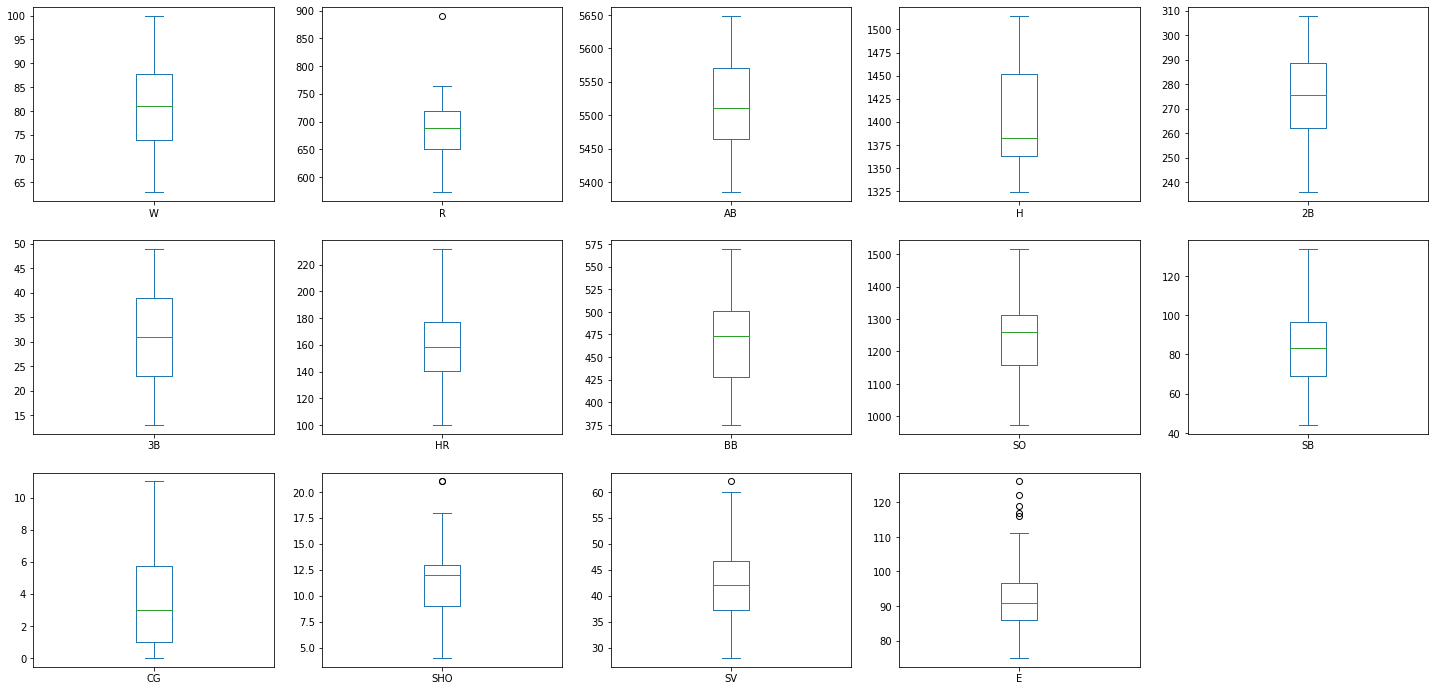

In [19]:
# to find out outliers in the dataset
df.plot(kind='box',subplots=True, layout=(6,5),figsize=(25,25))

from the above plots we can analyse that there are very few outliers present in the datasets.

As most of the outliers are present in the E column and a very few are present in SHO,SV and R column

In [20]:
# To Remove these outliers we use zscore technique here
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(30, 14)

In [21]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [22]:
# to check the shape of the dataframe after removing outliers
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 14)
(29, 14)


In [23]:
# Percentage Loss In Data
loss_percent=((30-29)/30)*100
loss_percent

3.3333333333333335

In [26]:
# to divide the data in to 2 as y (label) data and x data for making learning models
x=df_new.drop("W",axis=1)
y=df_new["W"]

In [27]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [28]:
# to find out best random state
max_r2=0
maxRs=0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.8891019924345592 on Random_State 97


In [29]:
# sliptting the data in to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [30]:
# assigining shortforms to make model
lr=LinearRegression()
ri=Ridge()
la=Lasso()
dtc=DecisionTreeRegressor()
svr=SVR()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [31]:
model=[lr,ri,la,dtc,svr,rf,gbr,abr]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Mean Absolute error: of',m)
    mae=mean_absolute_error(y_test,pred)
    print(mae)
    print('Mean Squared error: of',m)
    mse=mean_squared_error(y_test,pred)
    print(mse)
    print('Root Mean Squared error: of',m)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print(rmse)
    print('r2 score: of',m)
    r2score=r2_score(y_test,pred)
    print(r2score)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2score-crossval))
    print("\n")

Mean Absolute error: of LinearRegression()
5.290037982682844
Mean Squared error: of LinearRegression()
39.66244052407951
Root Mean Squared error: of LinearRegression()
6.297812360183456
r2 score: of LinearRegression()
0.7230706247348987
Cross Validation Score: -0.1213610604012831
Difference Between r2_score and CrossValidation Score: 0.8444316851361818


Mean Absolute error: of Ridge()
5.022523625659864
Mean Squared error: of Ridge()
49.3410878152765
Root Mean Squared error: of Ridge()
7.024321164018378
r2 score: of Ridge()
0.6554927926008622
Cross Validation Score: -0.12495754803800074
Difference Between r2_score and CrossValidation Score: 0.780450340638863


Mean Absolute error: of Lasso()
5.934811537729871
Mean Squared error: of Lasso()
51.10713675206957
Root Mean Squared error: of Lasso()
7.1489255662700515
r2 score: of Lasso()
0.6431619621655345
Cross Validation Score: -0.10161331744085156
Difference Between r2_score and CrossValidation Score: 0.744775279606386


Mean Absolute err

We See that difference between Lasso and its cross validation score is minimum so we will consider Lasso as our model

In [32]:
# hyperparameter tuning with lasso, parameters of lasso
parameter={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
           'fit_intercept' : [True,False],
           'normalize' : ['deprecated'], 
           'precompute' : [True,False],
           'copy_X' : [True,False],
           'max_iter' : [1000],
           'tol' : [0.0001], 
           'warm_start' : [True,False],
           'positive' : [True,False],
           'random_state' : [None],
           'selection' : ['cyclic', 'random']}

In [43]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(Lasso(), parameter,scoring='r2', verbose=1, cv=10, n_jobs=-1)

In [44]:
#training the model
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 448 candidates, totalling 4480 fits


In [46]:
#finding out which parameter is giving best accuracy
grid.best_params_

{'alpha': 1,
 'copy_X': False,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': True,
 'precompute': False,
 'random_state': None,
 'selection': 'random',
 'tol': 0.0001,
 'warm_start': True}

In [47]:
type(grid)

sklearn.model_selection._search.GridSearchCV

In [48]:
# finding best estimator
grid.best_estimator_

Lasso(alpha=1, copy_X=False, positive=True, selection='random', warm_start=True)

In [49]:
# Applying the parameters to the final model
pred = grid.best_estimator_.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2score)

0.7189694592378089


In [50]:
# saving the best model with parameters
model=Lasso(alpha=0.1, normalize='deprecated', positive=True, precompute=True,
      selection='random')
model.fit(x_train,y_train)

Lasso(alpha=0.1, positive=True, precompute=True, selection='random')

In [51]:
import joblib
joblib.dump(model,'baseball.pkl')

['baseball.pkl']